In [1]:
# https://atlas.ripe.net/docs/apis/rest-api-reference/#probes
# https://ripe-atlas-cousteau.readthedocs.io/en/latest/use.html#id1
import pandas as pd
import numpy  as np
import json
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

# Making the plots standard 
%matplotlib inline
plt.rcParams["figure.figsize"] = [16, 5]

In [2]:
#import the pickled dataframes you will be using for the experiments
experiment_df = pd.read_pickle('latency_noprobe.pickle')

In [3]:
#eliminate the NAN rows
nan_rows = experiment_df[experiment_df['last_rtt'].isnull()]
experiment_df = experiment_df.dropna(subset=['last_rtt'])
len(experiment_df)

1238995

In [4]:
# Select the rows with the largest distance
max_distance_row = experiment_df.loc[experiment_df['distance'].idxmax()]

src_prb = max_distance_row['prb_id'].iloc[0]
dst_prb = max_distance_row['dst_id'].iloc[0]

print(src_prb,dst_prb)

33627 1004200


In [5]:
longdist_df = experiment_df[(experiment_df['prb_id'] == src_prb) & (experiment_df['dst_id'] == dst_prb)]
longdist_df.head()


,fw,mver,lts,endtime,dst_name,dst_addr,src_addr,proto,af,size,...,hop_ip,rtt,unique_ips,avg_rtt,source_longitude,source_latitude,destination_longitude,destination_latitude,date,last_rtt
30331,4770,NaN,24,1683307692,88.24.67.177,88.24.67.177,192.168.1.8,ICMP,4,48,...,"[192.168.1.1, 192.168.1.1, 192.168.1.1]","[0.581, 0.437, 0.537]",[192.168.1.1],0.518333,2.1885,41.4005,-15.5025,28.0275,2023-05-05,38.742
30331,4770,NaN,24,1683307692,88.24.67.177,88.24.67.177,192.168.1.8,ICMP,4,48,...,"[81.46.38.142, 81.46.38.142, 81.46.38.142]","[2.121, 1.973, 4.033]",[81.46.38.142],2.709000,2.1885,41.4005,-15.5025,28.0275,2023-05-05,38.742
30331,4770,NaN,24,1683307692,88.24.67.177,88.24.67.177,192.168.1.8,ICMP,4,48,...,"[81.46.34.81, 81.46.34.81, 81.46.34.81]","[2.361, 2.191, 2.062]",[81.46.34.81],2.204667,2.1885,41.4005,-15.5025,28.0275,2023-05-05,38.742
30331,4770,NaN,24,1683307692,88.24.67.177,88.24.67.177,192.168.1.8,ICMP,4,48,...,"[81.46.34.133, 81.46.34.133, 81.46.34.133]","[35.332, 35.292, 35.282]",[81.46.34.133],35.302000,2.1885,41.4005,-15.5025,28.0275,2023-05-05,38.742
30331,4770,NaN,24,1683307692,88.24.67.177,88.24.67.177,192.168.1.8,ICMP,4,48,...,"[80.58.96.1, 80.58.96.1, 80.58.96.1]","[39.485, 41.118, 38.794]",[80.58.96.1],39.799000,2.1885,41.4005,-15.5025,28.0275,2023-05-05,38.742


In [6]:
# List of all the hops for the long distance traceroute
export_df = longdist_df.copy()
#export_df['new_time'] = export_df['new_time'].apply(lambda x: x.strftime('%Y-%m-%d %H:%M:%S'))
grouped_df = export_df.groupby([export_df.index, 'hop'])[['new_time','unique_ips']].agg(list)

# Create a new DataFrame with the grouped data
result_df = pd.DataFrame(grouped_df)

# Print the result DataFrame
result_df

# Export the result DataFrame to Excel
result_df.to_excel('longdist_hops.xlsx', index=True) 

In [7]:
#what is the longest distance{Km}?
export_df['distance'].iloc[0]

2188.8800938712834

In [8]:
#extract the time vs rtt for longest distance 
indices = longdist_df.index.unique()

long_rtt = []
long_time = []

for idx in indices:
    group = longdist_df[longdist_df.index == idx]
    long_rtt.append(group['last_rtt'].values[0])
    long_time.append(group['new_time'].values[0])


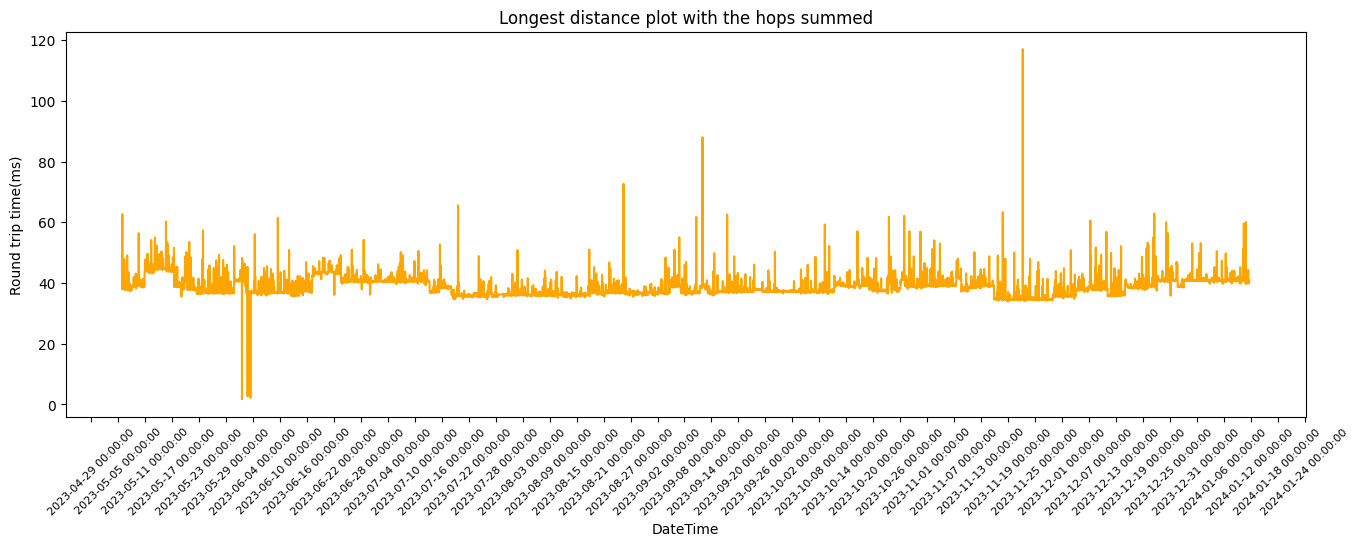

In [9]:
import seaborn as sns
import matplotlib.dates as mdates

fig, ax = plt.subplots()

sns.lineplot(x=long_time, y=long_rtt, ax=ax,color='orange')

ax.set_xlabel('DateTime')
ax.set_ylabel('Round trip time(ms)')
ax.set_title("Longest distance plot with the hops summed")

date_format = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', rotation=45, labelsize=8)
ax.xaxis.set_major_locator(plt.MaxNLocator(50))

plt.show()

In [10]:
#graphing all the hops 
indices = experiment_df.index.unique()

total_rtt = []
total_time = []
all_distance = []

for idx in indices:
    group = experiment_df[experiment_df.index == idx]
    total_rtt.append(group['last_rtt'].iloc[0])
    total_time.append(group['new_time'].values[0])
    all_distance.append(group['distance'].unique())

(0.0, 100.0)

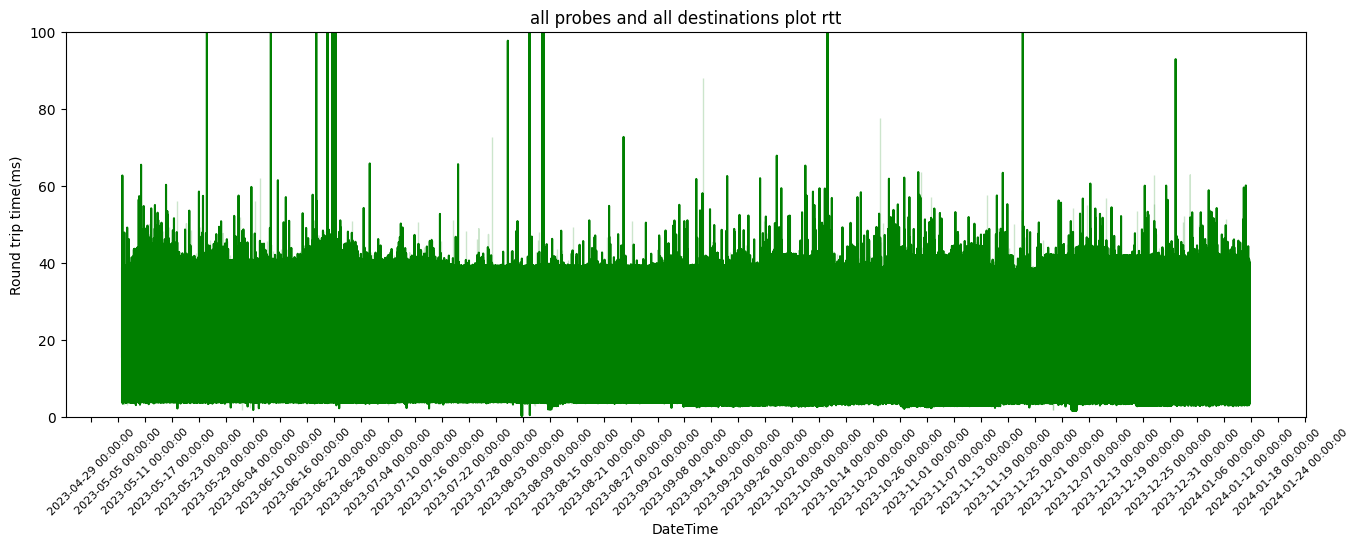

In [11]:
fig, ax = plt.subplots()

sns.lineplot(x=total_time, y=total_rtt, ax=ax,color='green')

ax.set_xlabel('DateTime')
ax.set_ylabel('Round trip time(ms)')
ax.set_title("all probes and all destinations plot rtt")

date_format = mdates.DateFormatter('%Y-%m-%d %H:%M:%S')
ax.xaxis.set_major_formatter(date_format)
ax.tick_params(axis='x', rotation=45, labelsize=8)
ax.xaxis.set_major_locator(plt.MaxNLocator(50))
ax.set_ylim(0,100)

In [12]:
#choosing a cut for for outlier values 
a=np.array(total_rtt)>100
np.sum(a)

34

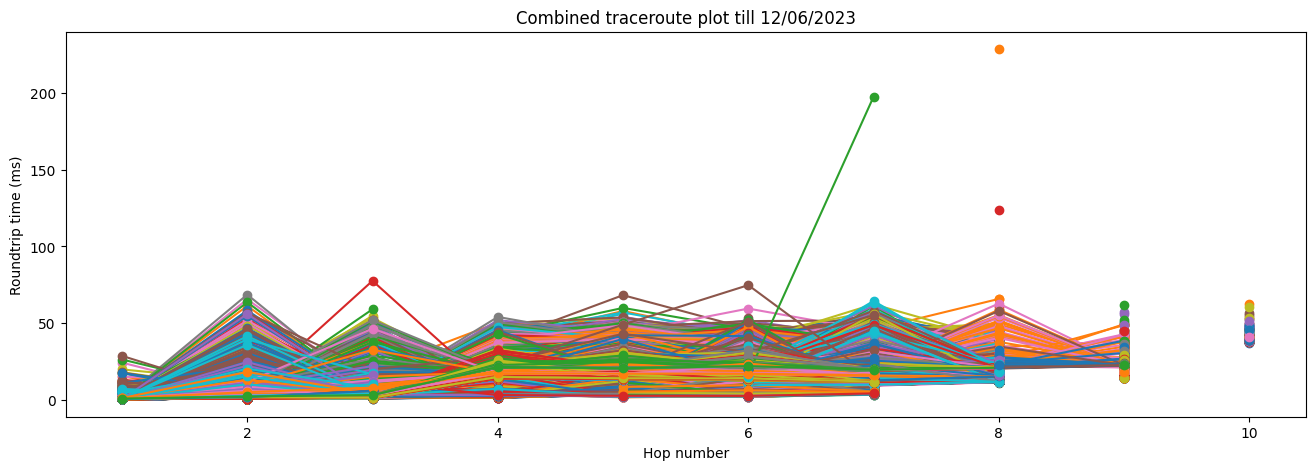

In [13]:
# Who is generating the outliers? 
# checking values before the 12th June 
indices = experiment_df.index.unique()
fig, ax = plt.subplots()

for idx in indices:
    group = experiment_df[experiment_df.index == idx]
    timew = group['new_time'].values[0]
    target_date = np.datetime64('2023-06-12')

    if timew <= target_date: 
        hops = group['hop']
        rtt = group['avg_rtt']
        ax.plot(hops,rtt, marker='o',label=f'Traceroute group {idx}')

ax.set_xlabel('Hop number')
ax.set_ylabel('Roundtrip time (ms)')
ax.set_title('Combined traceroute plot till 12/06/2023')
plt.show()    

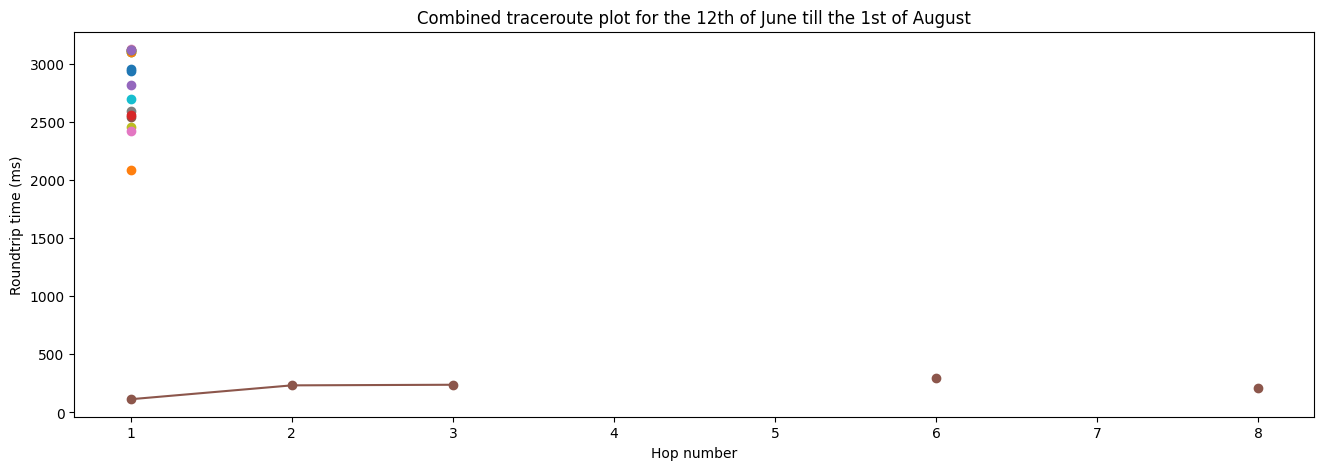

In [14]:
#checking the traceroute values betwen the 12th of June and the 1st of August 
#to see if there are any anomalies and who is generating them ? 

indices = experiment_df.index.unique()

src = []
dst = []
time = []

fig, ax = plt.subplots()

for idx in indices:
    group = experiment_df[experiment_df.index == idx]
    timew = group['new_time'].values[0]
    target_date = np.datetime64('2023-06-12')
    end_date = np.datetime64('2023-08-01')

    if  target_date <= timew <= end_date:
        rtt = group['avg_rtt']
        if rtt.values[0] > 100:
            hops = group['hop']
            srcw = group['prb_id'].values[0]
            dstw = group['dst_id'].values[0]
            timew = group['new_time'].values[0]
     
            src.append(srcw)
            dst.append(dstw)
            time.append(timew)
           
            ax.plot(hops,rtt, marker='o',label=f'Traceroute group {idx}')

ax.set_xlabel('Hop number')
ax.set_ylabel('Roundtrip time (ms)')
ax.set_title('Combined traceroute plot for the 12th of June till the 1st of August')
plt.show()    

In [15]:
# which probe is generating the outliers?
data = list(zip(src,dst,time))
outlier_df = pd.DataFrame(data, columns=['src_prb', 'dst_prb','time'])
outlier_df.head(3)

,src_prb,dst_prb,time
0,61357,14866,2023-06-20 12:08:49
1,61357,14866,2023-06-20 12:58:44
2,61357,14866,2023-06-22 09:58:46


In [16]:
#mean and standard deviation plots without outliers
new_idx = []
indices = experiment_df.index.unique()
for idx in indices:
    group = experiment_df[experiment_df.index == idx]
    if group['avg_rtt'].sum() <= 250: 
        new_idx.append(idx)

draw_df = experiment_df.loc[new_idx]

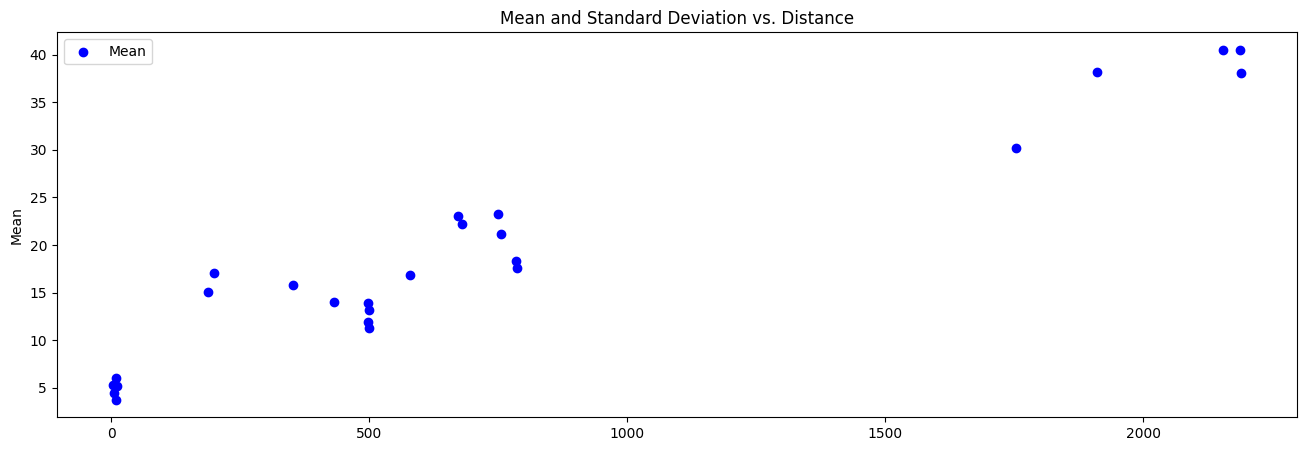

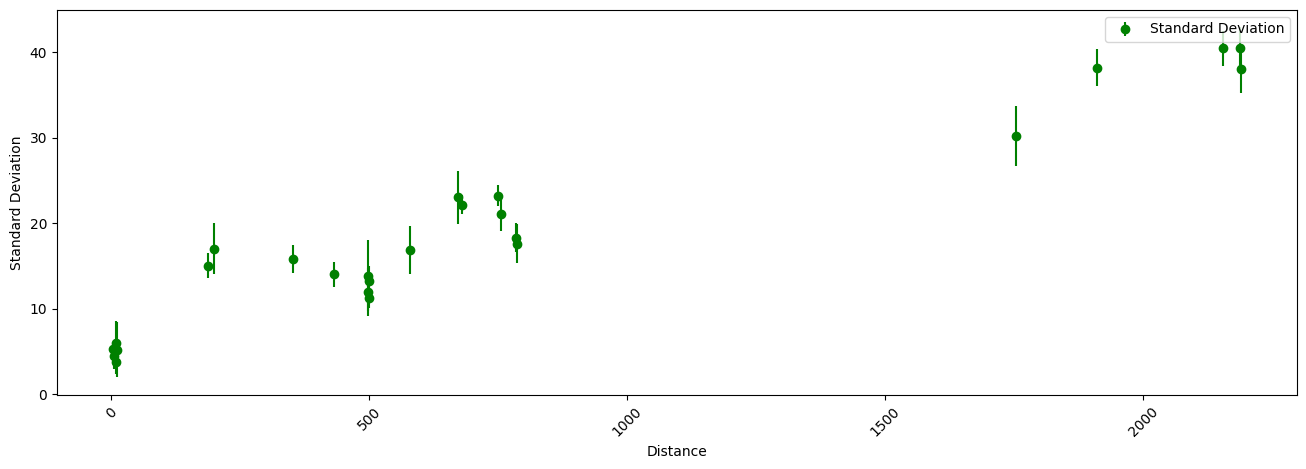

In [17]:
grouped_data = draw_df.groupby(['prb_id', 'dst_id'])
mean = grouped_data['last_rtt'].mean()
std = grouped_data['last_rtt'].std()
distance = grouped_data['distance'].unique()

fig, ax = plt.subplots()
plt.scatter(distance, mean, label='Mean',color="BLUE")
plt.ylabel('Mean')
plt.legend()
plt.title('Mean and Standard Deviation vs. Distance')

fig2, ax2 = plt.subplots()
plt.errorbar(distance, mean, yerr=std, fmt='o',label='Standard Deviation',color="GREEN")

plt.xlabel('Distance')
plt.ylabel('Standard Deviation')
plt.legend()

plt.xticks(rotation=45)
plt.tick_params(axis='x', which='both', bottom=True)
plt.show()



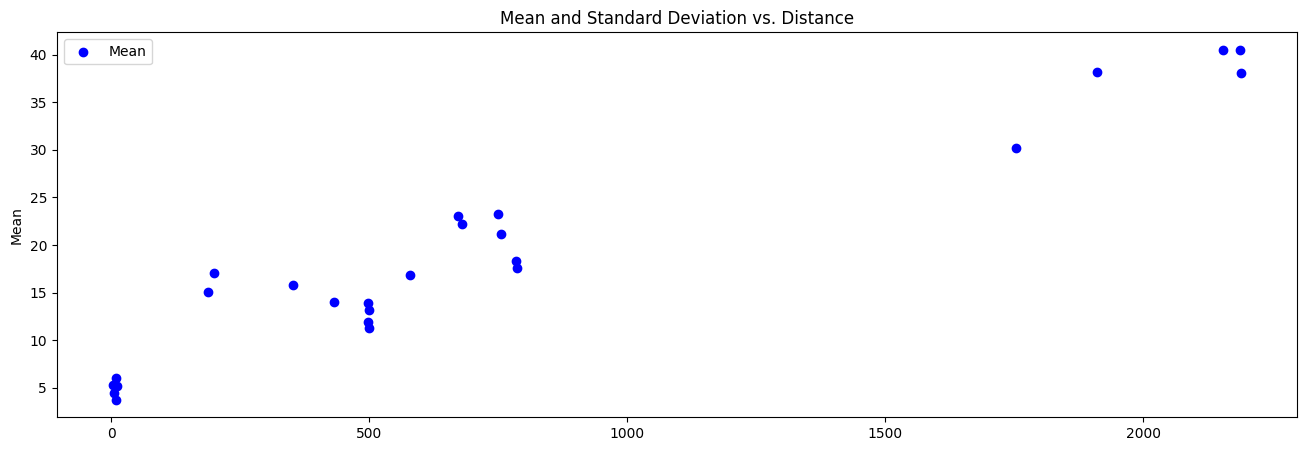

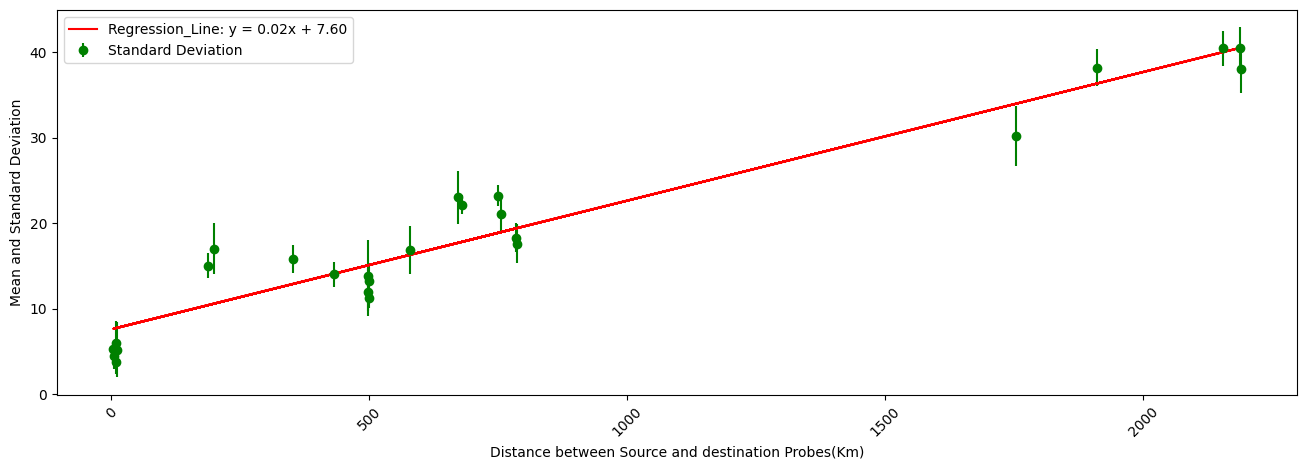

In [18]:
# Extract 'distance' column and convert to numeric type
distance = grouped_data['distance'].unique().astype(float)

mean = grouped_data['last_rtt'].mean()
std = grouped_data['last_rtt'].std()


# Calculate regression line parameters
slope, intercept = np.polyfit(distance, mean, 1)
regression_line = slope * distance + intercept

# Scatter plot with mean
fig, ax = plt.subplots()
plt.scatter(distance, mean, label='Mean', color="BLUE")
plt.ylabel('Mean')
plt.legend()
plt.title('Mean and Standard Deviation vs. Distance')

# Error bar plot with standard deviation
fig2, ax2 = plt.subplots()
plt.errorbar(distance, mean, yerr=std, fmt='o', label='Standard Deviation', color="GREEN")
plt.plot(distance, regression_line, label=f'Regression_Line: y = {slope:.2f}x + {intercept:.2f}', color="RED")  # Add regression line
plt.xlabel('Distance between Source and destination Probes(Km)')
plt.ylabel('Mean and Standard Deviation')
plt.legend()

plt.xticks(rotation=45)
plt.tick_params(axis='x', which='both', bottom=True)
plt.show()
